<a href="https://colab.research.google.com/github/Joysreechy/Data-Analysis/blob/main/Plyorientation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

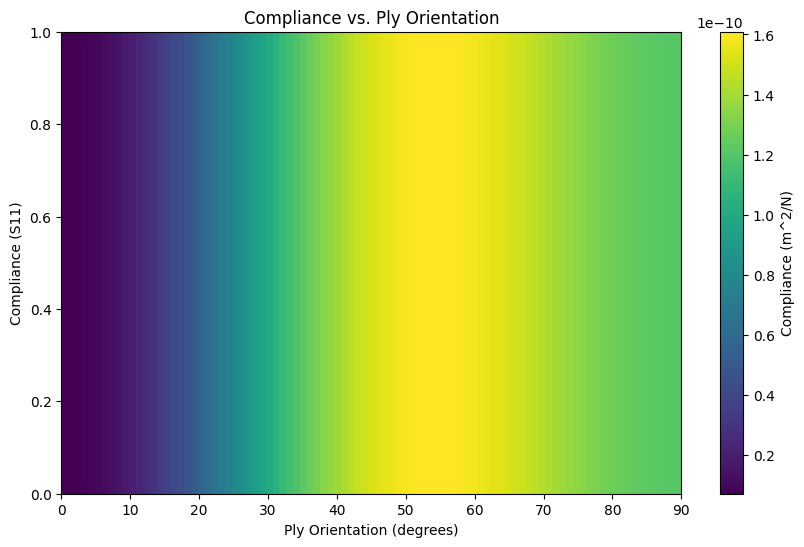

In [5]:
# prompt: generate code for desired ply orientation to have a carpet plot under different load

import matplotlib.pyplot as plt
import numpy as np

def carpet_plot(loads, ply_orientations, properties):
    """
    Generates a carpet plot of material properties under different loads and ply orientations.

    Args:
        loads (list): List of applied loads.
        ply_orientations (list): List of ply orientations (in degrees).
        properties (dict): Dictionary where keys are property names (e.g., 'E1', 'E2', 'G12')
                           and values are functions that take load and ply orientation as input
                           and return the property value.
    """

    num_loads = len(loads)
    num_orientations = len(ply_orientations)

    fig, axes = plt.subplots(len(properties), 1, figsize=(8, 6 * len(properties)))  # Adjust figsize as needed

    if len(properties) == 1:
        axes = [axes]  # Handle the case with only one property

    for i, (property_name, property_function) in enumerate(properties.items()):
        ax = axes[i]

        # Create a matrix to store property values
        property_matrix = np.zeros((num_loads, num_orientations))

        for j, load in enumerate(loads):
            for k, orientation in enumerate(ply_orientations):
                property_matrix[j, k] = property_function(load, orientation)

        # Create the carpet plot
        im = ax.imshow(property_matrix, cmap='viridis', aspect='auto', extent=[ply_orientations[0], ply_orientations[-1], loads[0], loads[-1]]) # Use extent for correct axis scales

        # Add labels and title
        ax.set_xlabel("Ply Orientation (degrees)")
        ax.set_ylabel("Load")
        ax.set_title(f"Carpet Plot of {property_name}")

        # Add colorbar
        cbar = fig.colorbar(im, ax=ax)
        cbar.set_label(property_name)

        # Show the loads and orientations as ticks
        ax.set_xticks(ply_orientations)
        ax.set_yticks(loads)

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()


# Example Usage
loads = [10, 20, 30, 40]
ply_orientations = [0, 15, 30, 45, 60, 75, 90]

# Example property functions (replace with your actual functions)
def elastic_modulus(load, orientation):
    # Replace this with your actual calculation
    return 1000 + load * 0.5 + np.sin(np.radians(orientation)) * 50


def poisson_ratio(load, orientation):
    # Replace this with your actual calculation
    return 0.3 + load * 0.001 + np.cos(np.radians(orientation)) * 0.05

properties = {'Elastic Modulus': elastic_modulus, 'Poisson Ratio': poisson_ratio}

carpet_plot(loads, ply_orientations, properties)


In [6]:
import numpy as np

def predict_optimal_ply_orientations(load_conditions, material_properties):
    """
    Predicts optimal ply orientations for composite laminates based on input load conditions and material properties.

    Args:
        load_conditions (dict): A dictionary containing load conditions, e.g., {'Mx': 10, 'My': 5, 'Mxy': 2}.
        material_properties (dict): A dictionary containing material properties, e.g., {'E1': 150e9, 'E2': 10e9, ...}.


    Returns:
        list: A list of optimal ply orientations (in degrees)
    """

    # Placeholder implementation:  This needs to be replaced by a proper optimization algorithm
    #  (e.g. genetic algorithm, gradient-based optimization) considering failure criteria, weight minimization etc.

    # Example: Simple heuristic based on dominant load
    # Fix: Use a lambda function to apply abs() to the dictionary values
    dominant_load = max(load_conditions, key=lambda k: abs(load_conditions[k]))

    if dominant_load == 'Mx':
        orientations = [0, 0, 0, 90, 90, 90]  # Example: Orient most plies along x-axis for Mx dominance
    elif dominant_load == 'My':
        orientations = [90, 90, 90, 0, 0, 0]   # Example: Orient most plies along y-axis for My dominance
    elif dominant_load == 'Mxy':
        orientations = [45, 45, -45, -45, 0, 90] # Example: +- 45 for shear
    else:
        orientations = [0, 45, -45, 90] # Default

    return orientations


# Example usage:
load_conditions = {'Mx': 10, 'My': 5, 'Mxy': 2, 'Nx': 1}
material_properties = {'E1': 150e9, 'E2': 10e9, 'G12': 5e9, 'nu12': 0.3}  # Placeholder

optimal_orientations = predict_optimal_ply_orientations(load_conditions, material_properties)
print("Predicted Optimal Ply Orientations:", optimal_orientations)

Predicted Optimal Ply Orientations: [0, 0, 0, 90, 90, 90]
